# Bike Sharing Assignment

#### Introduction
In this assignment we need to build a model for the prediction of demand for shared bikes.

#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



### Importing important libraries

In [7]:
# To ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing necessary libraries to analyse the data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [9]:
#To show full outputs 
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full width of columns

### Reading and Understanding the bike_sharing_data csv file

In [11]:
# Reading the data from csv file
bike_sharing_data = pd.read_csv("bike_sharing_dataset.csv")

In [12]:
#checking the data set
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#checking the shape
bike_sharing_data.shape

(730, 16)

In [14]:
#checking the columns of the data set
bike_sharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
#checking the info of this data set
bike_sharing_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [16]:
# checking the data set
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [17]:
#checking for the null values
round(bike_sharing_data.isnull().sum() / bike_sharing_data.shape[0] * 100.00,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Insights:
- As we can see there is no null values in this data set.

In [19]:
# Now renaming few columns for better readibility

bike_sharing_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

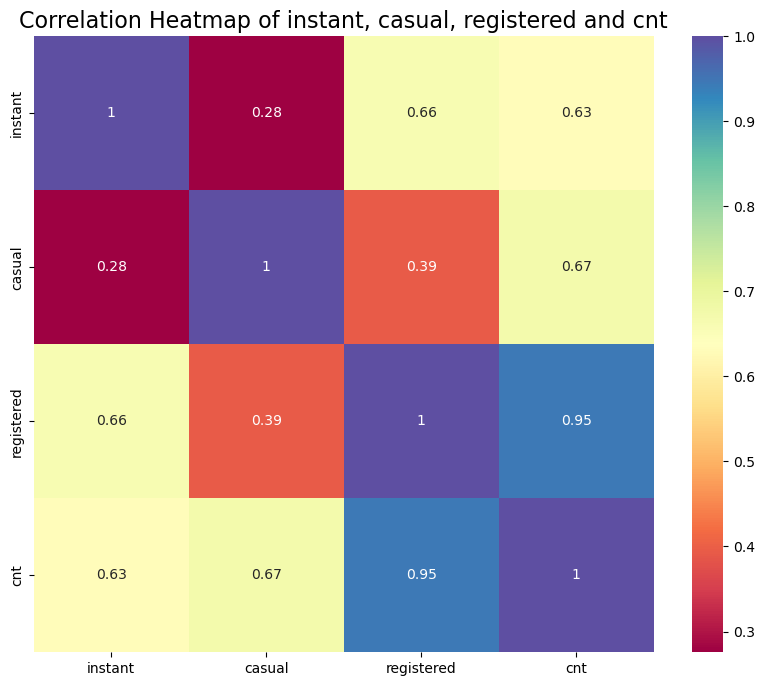

In [20]:
# now checking correaltion between source and cnt
Source = bike_sharing_data[['instant','casual','registered','cnt']]
source_corr = Source.corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(source_corr,
                 xticklabels=source_corr.columns,
                 yticklabels=source_corr.columns,
                 annot=True,
                 cmap="Spectral")
ax.set_title('Correlation Heatmap of instant, casual, registered and cnt', fontsize=16)

plt.show()

#### Insights
- Strong Positive Correlation: registered and cnt have a very high correlation (0.95). This indicates that the total bike rentals (cnt) are strongly influenced by the number of registered users.
casual and cnt also have a strong positive correlation (0.67), showing that casual users significantly contribute to the total rentals, though less so than registered users.
- Moderate Correlation: instant shows moderate positive correlations with registered (0.66) and cnt (0.63). This suggests that the sequential index (instant) is somewhat related to the overall rental trends, possibly reflecting growth over time.
- Low Correlation: casual and registered have a lower correlation (0.39), indicating that these two types of users might have different usage patterns or respond differently to factors like weather or day of the week.

In [22]:
# now dropping the unwanted coulmns 
bike_sharing_data.drop(['instant','casual','dteday','registered'],axis=1,inplace=True)

In [23]:
# checking the shape
bike_sharing_data.shape

(730, 12)

In [24]:
# mapping the season column of this data set

bike_sharing_data.season = bike_sharing_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [25]:
# mapping the month column of this data set

bike_sharing_data.month = bike_sharing_data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [26]:
# mapping the weekday column of this data set

bike_sharing_data.weekday = bike_sharing_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [27]:
# mapping the weathersit column of this data set

bike_sharing_data.weathersit = bike_sharing_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [28]:
# checking the data
bike_sharing_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
# checking the info of this data set again
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Data Visualisation

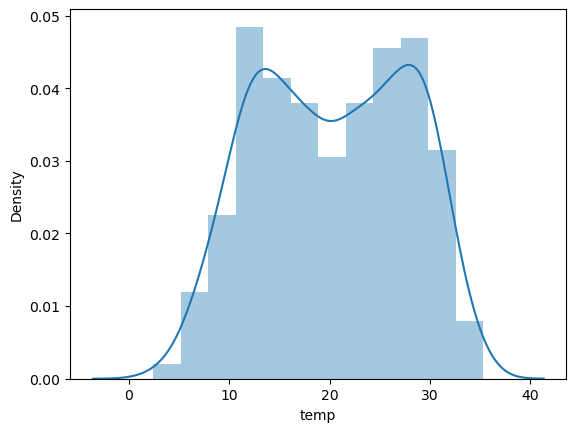

In [31]:
# temperature visualisation
sns.distplot(bike_sharing_data['temp'])
plt.show()

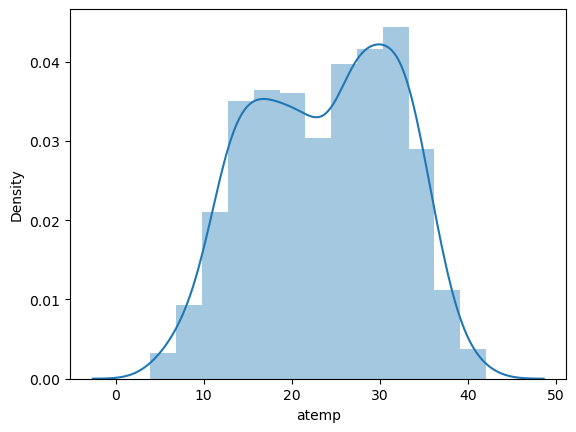

In [32]:
# visulisation of atemp
sns.distplot(bike_sharing_data['atemp'])
plt.show()

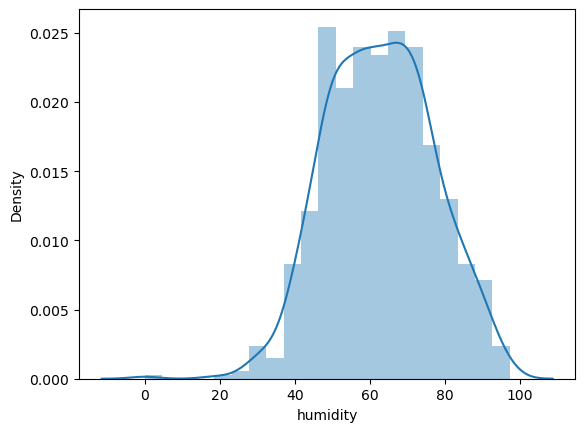

In [33]:
# humidity visualisation
sns.distplot(bike_sharing_data['humidity'])
plt.show()

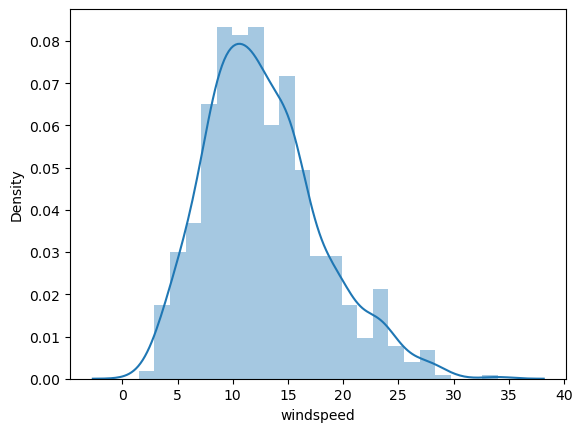

In [34]:
# wind speed visualisation
sns.distplot(bike_sharing_data['windspeed'])
plt.show()

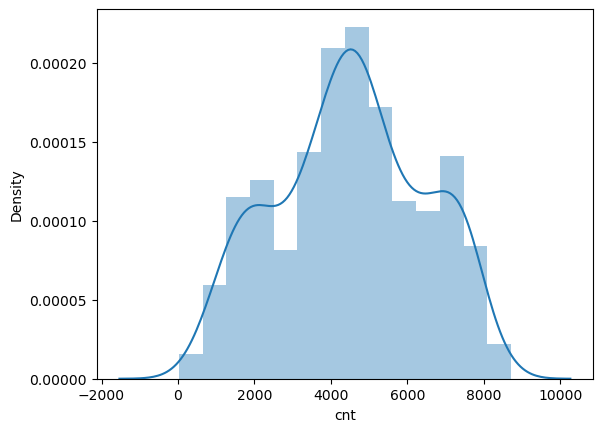

In [35]:
# Target:-- count of total rental bikes including both casual and registered
sns.distplot(bike_sharing_data['cnt'])
plt.show()

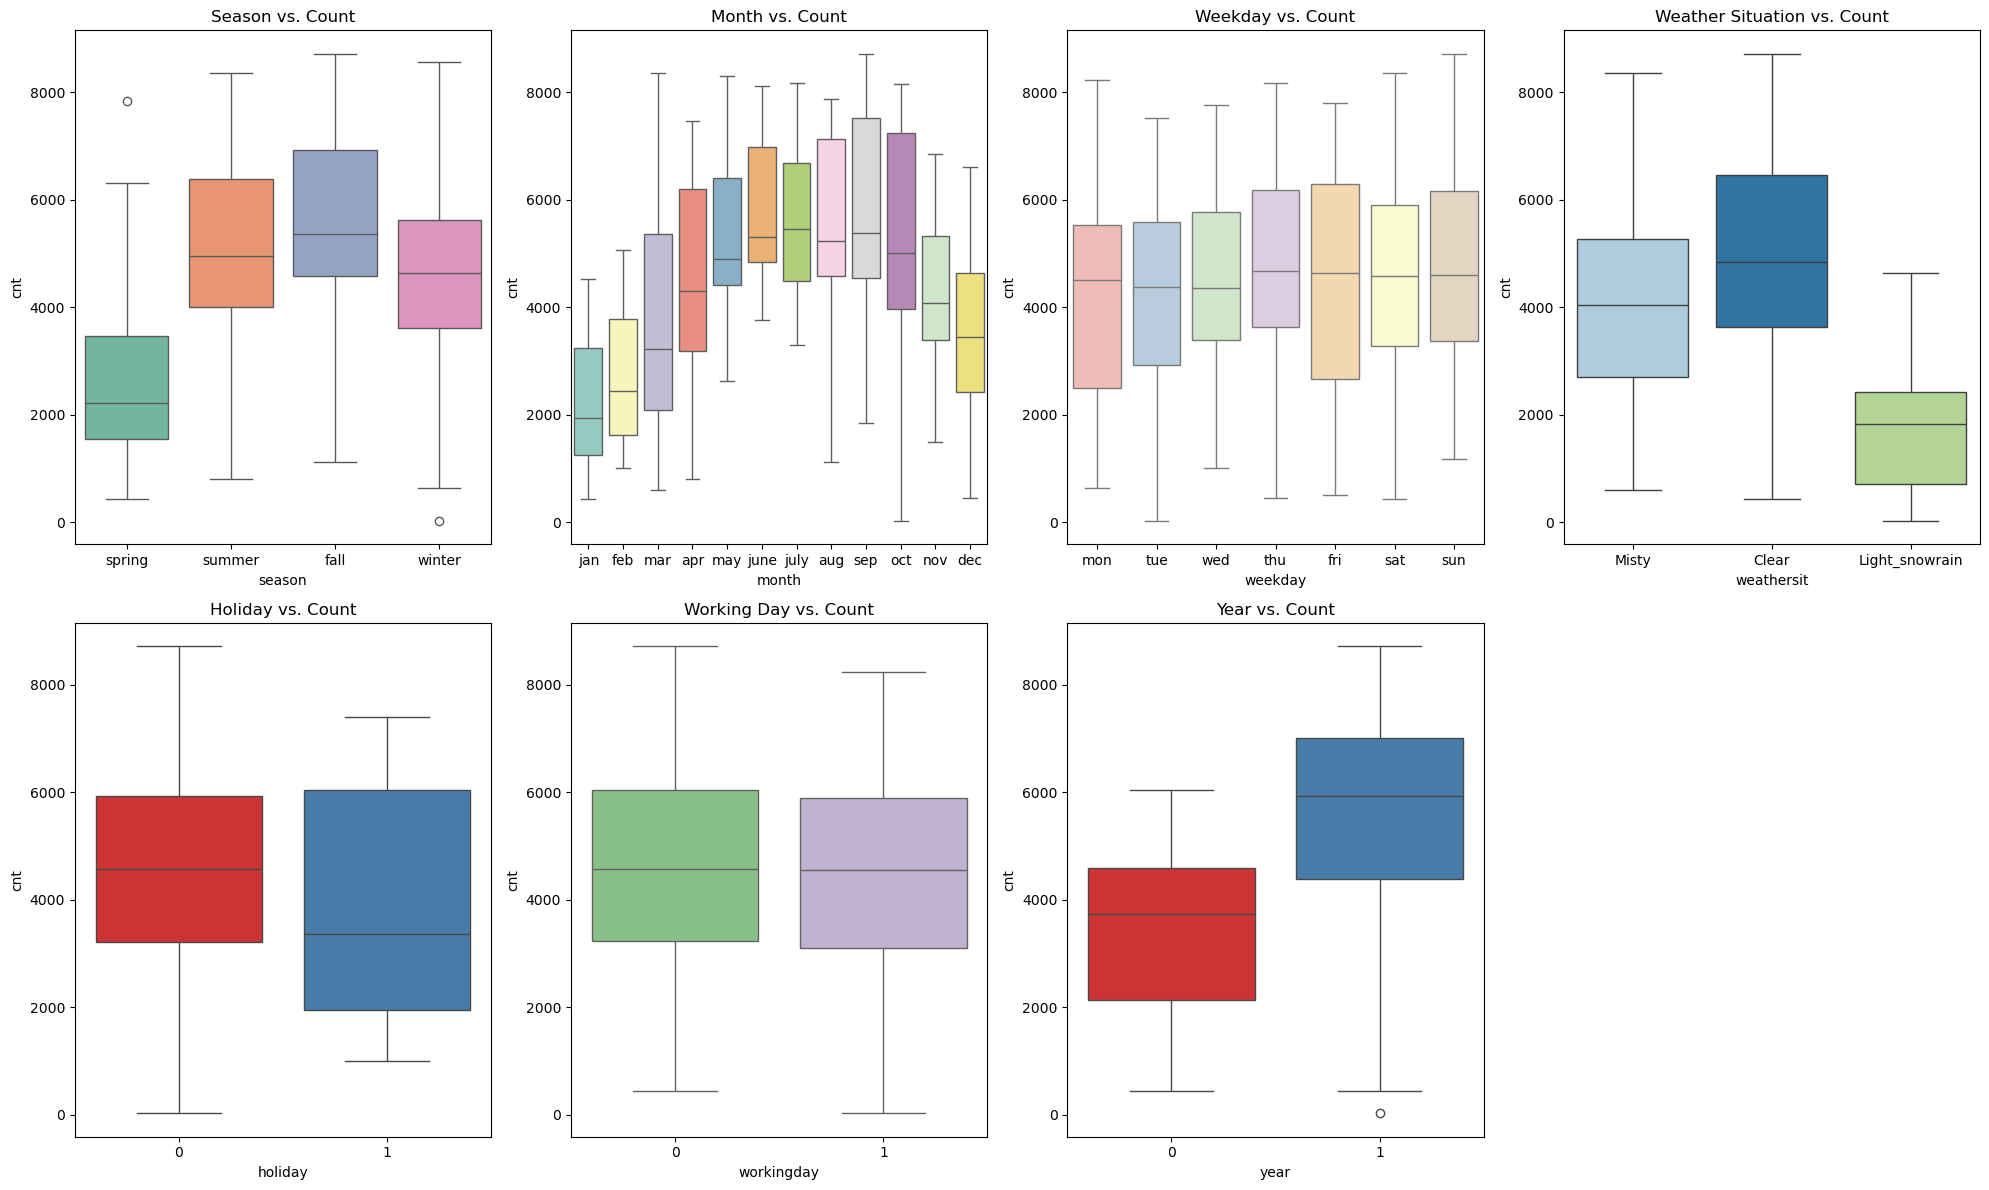

In [36]:
# Now visualizing the categorical columns
# analysing how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike_sharing_data, palette='Set2')
plt.title('Season vs. Count')

plt.subplot(2, 4, 2)
sns.boxplot(x='month', y='cnt', data=bike_sharing_data, palette='Set3')
plt.title('Month vs. Count')

plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing_data, palette='Pastel1')
plt.title('Weekday vs. Count')

plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing_data, palette='Paired')
plt.title('Weather Situation vs. Count')

plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing_data, palette='Set1')
plt.title('Holiday vs. Count')

plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing_data, palette='Accent')
plt.title('Working Day vs. Count')

plt.subplot(2, 4, 7)
sns.boxplot(x='year', y='cnt', data=bike_sharing_data, palette='Set1')
plt.title('Year vs. Count')

plt.tight_layout()
plt.show()

#### Insights:
- Seasonality plays a crucial role in bike rentals, with summer and fall being the peak periods.
- Weather conditions are another strong factor, with clear weather boosting rentals and adverse weather like light snow/rain significantly reducing them.
- The yearly trend suggests a growing popularity or usage of bike rentals over time.
- Seasonality plays a crucial role in bike rentals, with summer and fall being the peak periods.
- Weather conditions are another strong factor, with clear weather boosting rentals and adverse weather like light snow/rain significantly reducing them.
- The yearly trend suggests a growing popularity or usage of bike rentals over time.
- Counts are highest during summer and under clear weather conditions, while spring and adverse weather (like light snow/rain) lead to lower counts.

- There is a noticeable increase in counts from January to June, peaking around June, and a significant overall increase in counts from the first year to the second year.

- The counts are fairly consistent across all weekdays, with no strong weekly pattern, and only a slight variation between working days and holidays.

- The boxplots indicate that bike rental counts are higher in summer, on clear weather days, in the second year, and generally higher on non-holidays and working days.






In [38]:
# creating a function to make barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize=(12, 6))
    
    # First subplot: Barplot without hue, with a custom palette for color
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike_sharing_data, palette='Set2')
    plt.title(f'{column} vs Count')
    
    # Second subplot: Barplot with hue, using a different palette
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike_sharing_data, hue='year', palette='Set1')
    plt.title(f'{column} vs Count by Year')
    plt.legend(labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

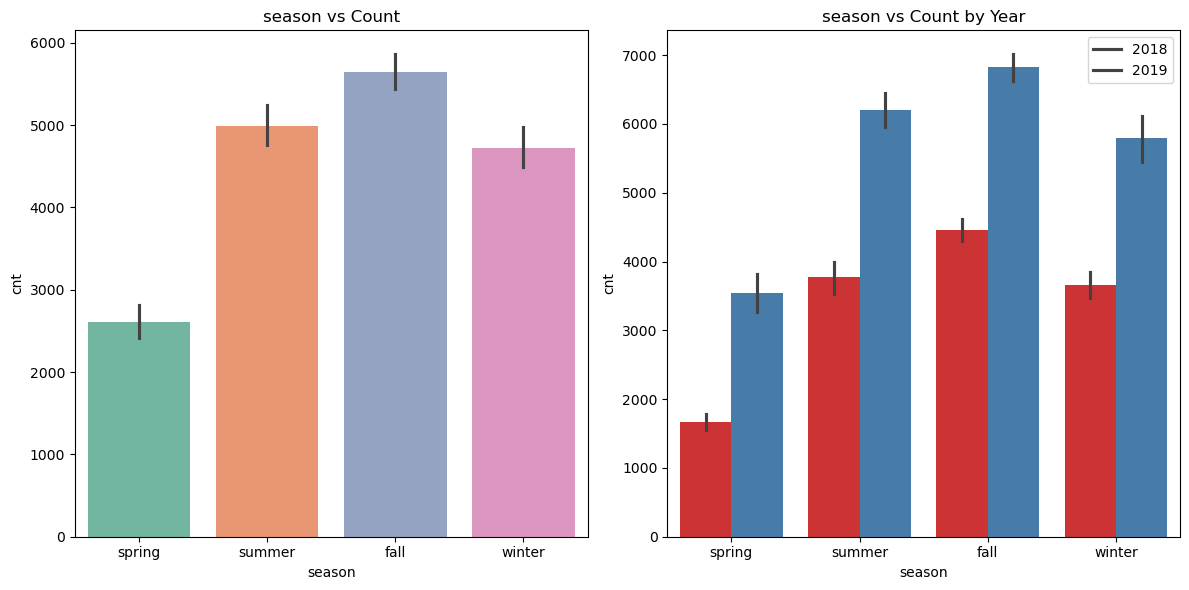

In [39]:
# now visualization for season column

plot_cat_columns('season')

#### Insights:
- Bike rentals peak during the fall and summer, with winter having the lowest counts.
- In 2019, bike rentals were consistently higher across all seasons compared to 2018.
- Notably, winter saw a significant increase in bike rentals from 2018 to 2019.
- Although spring has the lowest rental count, it also shows growth from 2018 to 2019.

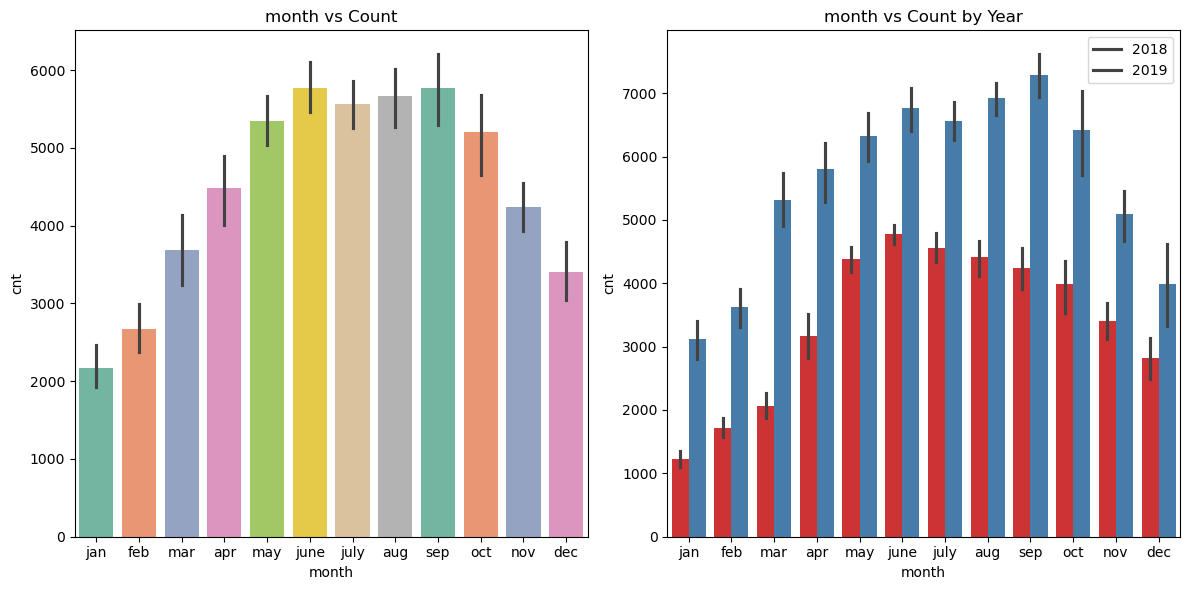

In [41]:
# plotting visualization for month column

plot_cat_columns('month')

#### Insights:
- Bike rentals are highest from June to September, with a noticeable peak in July.
- Rentals increased in 2019 across almost all months compared to 2018.
- January, February, and December have the lowest rental counts, but still show growth in 2019.
- The increase from 2018 to 2019 is consistent across all months, with the most significant differences seen during the peak summer months.

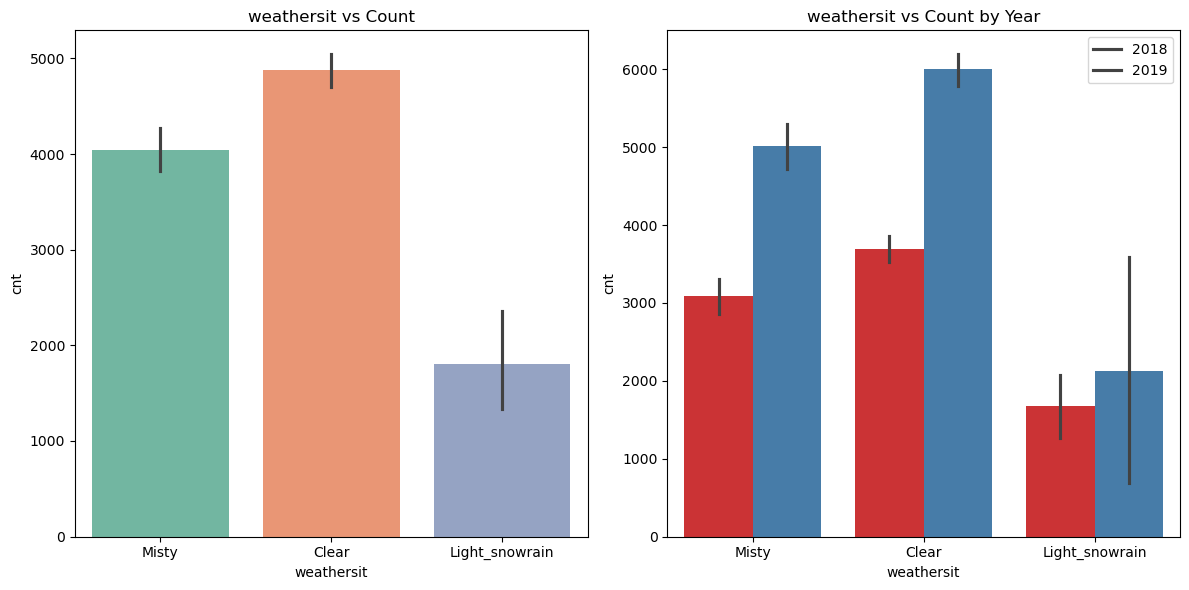

In [43]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

#### Insights:
- Clear weather consistently has the highest count, suggesting that more activities or events occur during clear weather conditions.
- Misty weather shows a significant increase in count from 2018 to 2019.
- Light Snow/Rain has the lowest count, indicating fewer activities or events during these conditions, with more variability in 2019.
- Overall, there seems to be an increase in counts from 2018 to 2019 for most weather conditions.

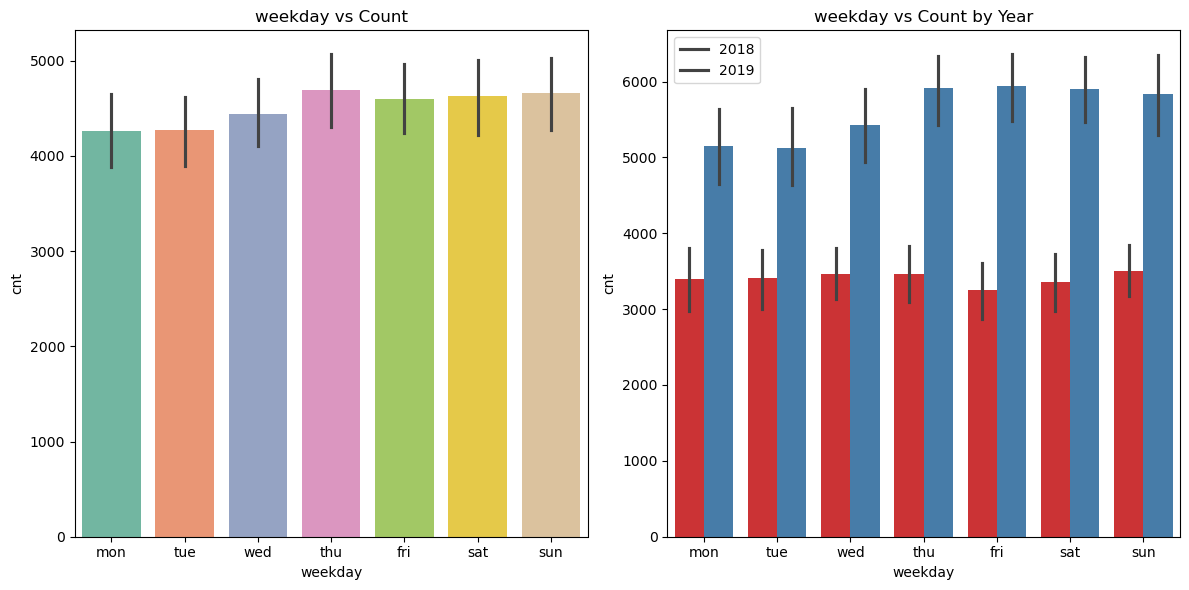

In [45]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

#### Insights
- The counts are fairly even across the week, suggesting that the activities or occurrences are not heavily dependent on the day of the week.
- There is a noticeable increase in counts from 2018 to 2019 across all weekdays, indicating growth or an increase in activity during the period.
- Thursday, Saturday, and Sunday show slightly higher activity, which might suggest these days are more popular or busier.
- The small error bars indicate that the counts are consistent, with little variation, across different instances of the same weekday.

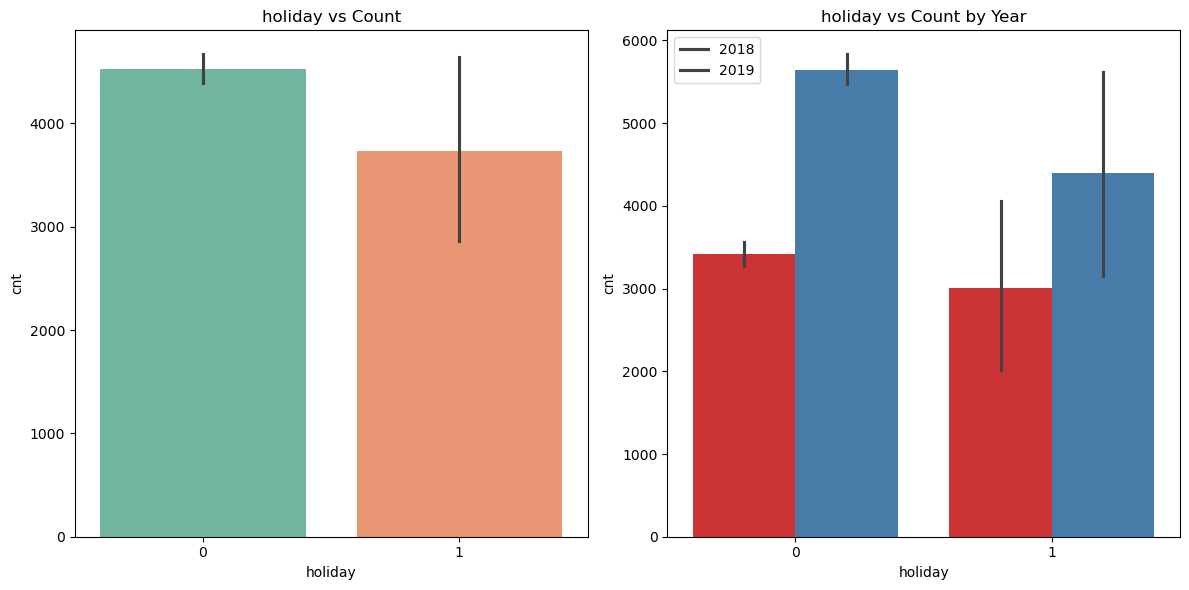

In [47]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

#### Insights:
- The counts are consistently higher on non-holidays, indicating that more activities or occurrences happen on regular days compared to holidays.
- Both holidays and non-holidays show an increase in counts from 2018 to 2019, suggesting a general rise in activity during this period.
- The larger error bars for holidays, especially in 2019, indicate that there is more variability in activity on holidays, which could be due to the nature of holidays themselves like some holidays might see more activity than others.
- The overall pattern is stable across the two years, with non-holidays being more active than holidays.

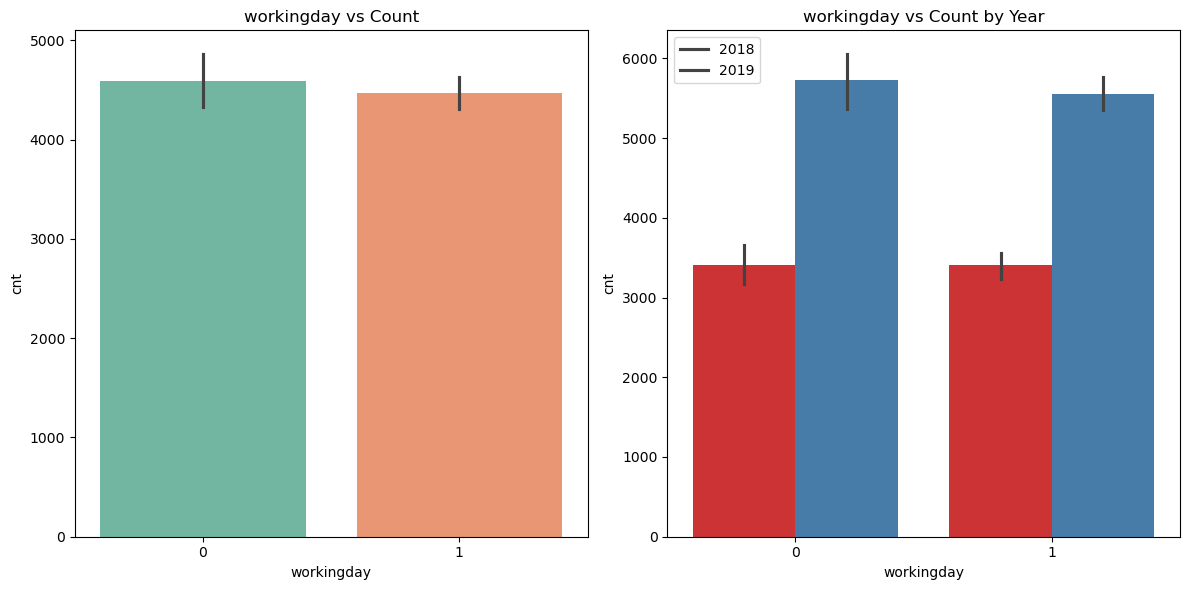

In [49]:
# now plotting visualization for workingday column

plot_cat_columns('workingday')

#### Insights: 
- Counts are slightly higher on non-working days overall.
- In 2019, counts increased compared to 2018, especially on working days.
- 2018 had lower counts on both working and non-working days.
- The trend shows a rise in activity in 2019, particularly on working days.

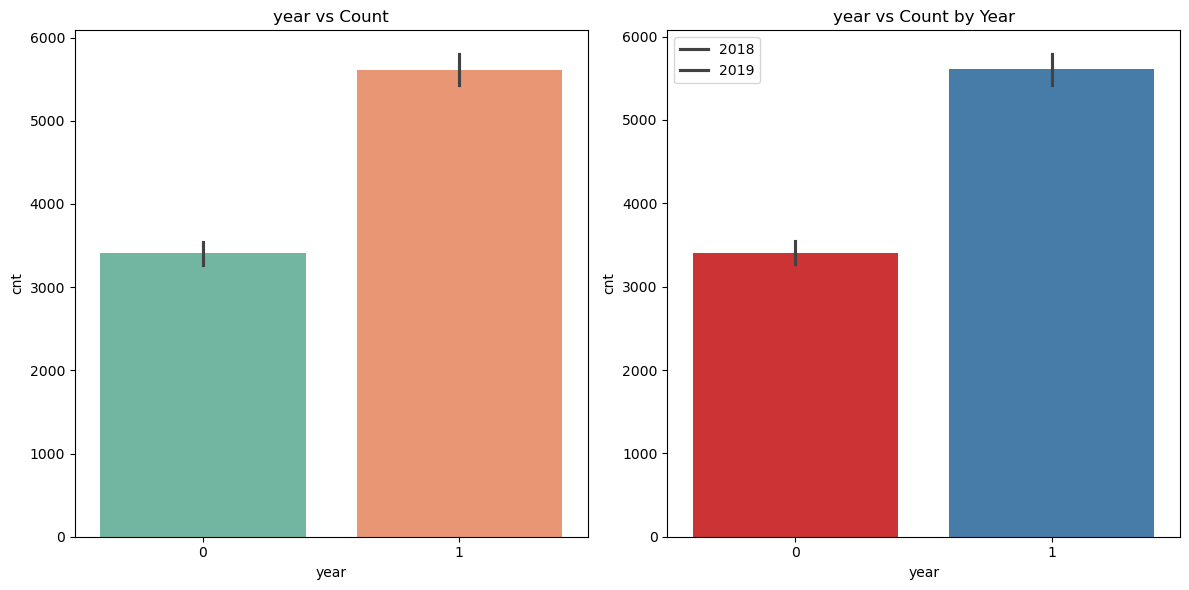

In [51]:
# plotting visualization for year column

plot_cat_columns('year')

#### Insights:
- The count (cnt) is significantly higher in 2019 compared to 2018.
- Both in the overall comparison (left plot) and when split by year (right plot), 2019 shows a clear increase in counts.
- The 2018 count remains consistent, whereas the 2019 count spikes significantly.
- This indicates a substantial growth in activity  from 2018 to 2019.

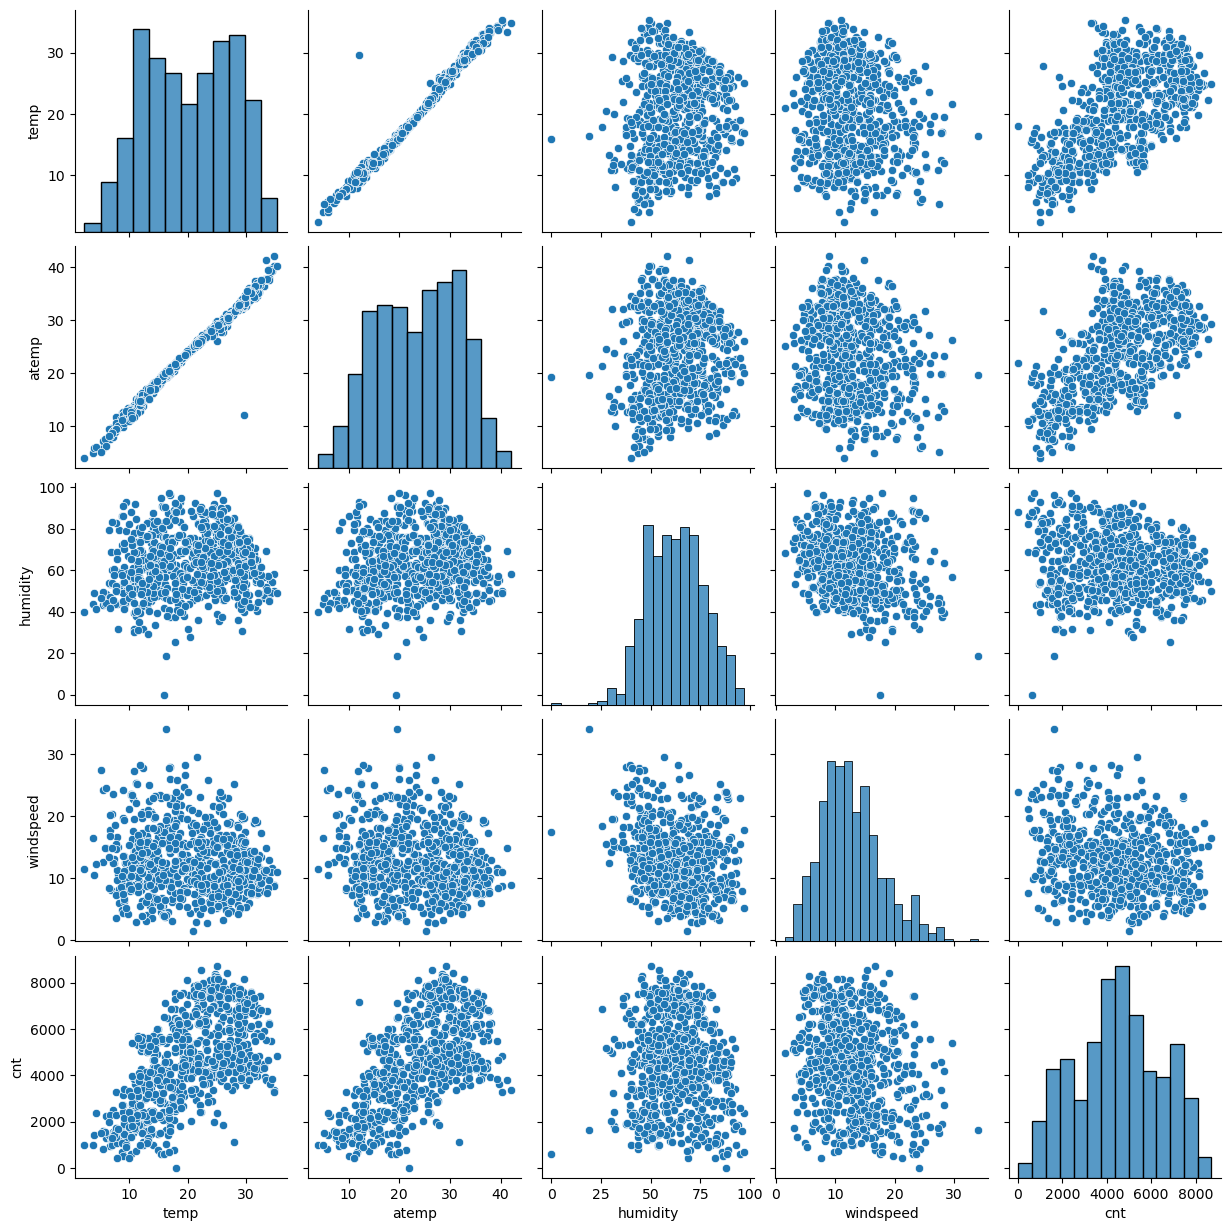

In [53]:
# visualizing the numerical columns of this data set

sns.pairplot(data=bike_sharing_data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

#### Inisghts
- Temp and Atemp: Strongly correlated, indicating they measure similar aspects of temperature.
- Cnt vs. Temp/Atemp: Positive correlation, suggesting higher temperatures lead to increased counts.
- Humidity and Windspeed: Show no strong correlation with count, indicating they have less influence on the number of events.
- Key Insight: Temperature (both actual and apparent) is a significant driver of the event count, while humidity and windspeed are less impactful.

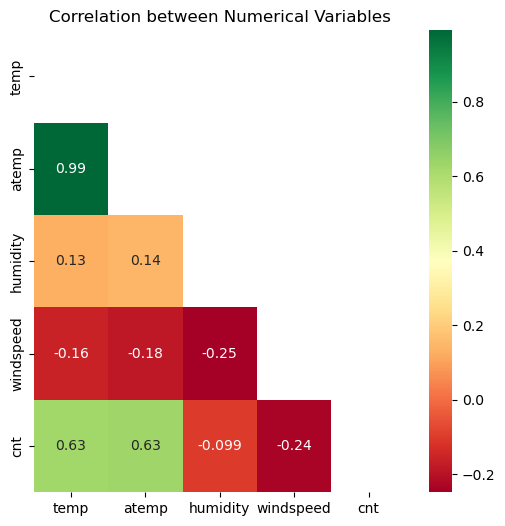

In [55]:
# Checking the correlation between the numerical variables in this data set

# Setting the figure size for the heatmap
plt.figure(figsize=(6, 6))

# Computing the correlation matrix for the selected numerical columns
correlation_matrix = bike_sharing_data[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr()

# Creating an upper triangle matrix mask to avoid repeating the same correlations twice
# np.triu() returns the upper triangle of an array
matrix = np.triu(correlation_matrix)

# Plotting the heatmap with annotations, using a red-yellow-green color map
# 'mask=matrix' applies the upper triangle mask to the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", mask=matrix)

# Adding a title to the heatmap
plt.title("Correlation between Numerical Variables")

# Displaying the plot
plt.show()

Insights:
- The correlation between temperature (temp) and feels-like temperature (atemp) is extremely strong (0.99). Consider dropping one to avoid multicollinearity, as they provide almost identical information.

- Both temp and atemp have a moderate positive correlation with bike rentals (cnt), with a coefficient of 0.63, indicating that warmer weather leads to more rentals.

- Windspeed shows a weak negative correlation (-0.24) with cnt, suggesting that higher wind speeds slightly reduce bike rentals due to discomfort.

- The correlation between humidity and cnt is very weak (-0.099), indicating that humidity has little to no significant effect on bike rental numbers.

- Drop either temp or atemp to avoid redundancy, prioritize temperature variables as key predictors, and include windspeed in the model for its contribution, despite its weaker correlation.

### Data Preparation

In [58]:
# Now, making Dummy variable creation for month, weekday, weathersit and season variables.

months_d=pd.get_dummies(bike_sharing_data.month,drop_first=True)
weekdays_d=pd.get_dummies(bike_sharing_data.weekday,drop_first=True)
weathersit_d=pd.get_dummies(bike_sharing_data.weathersit,drop_first=True)
seasons_d=pd.get_dummies(bike_sharing_data.season,drop_first=True)

In [59]:
# checking the data set
bike_sharing_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [60]:
# Merging  the dataframe, with the dummy variable dataset. 

bk_new = pd.concat([bike_sharing_data,months_d,weekdays_d,weathersit_d,seasons_d],axis=1)

In [61]:
# checking the data set again
bk_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [62]:
# getting the info of the data set
bk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [63]:
# Identifing the boolean columns in the DataFrame
bool_columns = bk_new.select_dtypes(include=['bool']).columns

In [64]:
# Converting the boolean columns to uint8
bk_new[bool_columns] = bk_new[bool_columns].astype('uint8')

# Verify the change
print(bk_new.dtypes)

season             object
year                int64
month              object
holiday             int64
weekday            object
workingday          int64
weathersit         object
temp              float64
atemp             float64
humidity          float64
windspeed         float64
cnt                 int64
aug                 uint8
dec                 uint8
feb                 uint8
jan                 uint8
july                uint8
june                uint8
mar                 uint8
may                 uint8
nov                 uint8
oct                 uint8
sep                 uint8
mon                 uint8
sat                 uint8
sun                 uint8
thu                 uint8
tue                 uint8
wed                 uint8
Light_snowrain      uint8
Misty               uint8
spring              uint8
summer              uint8
winter              uint8
dtype: object


In [65]:
# checking the data set again
bk_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
# now will be dropping the unnecessary columns as we have already created dummy variables out of it.

bk_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [67]:
# checking the shape
bk_new.shape

(730, 30)

### Splitting the Data into Training and Testing Sets

In [69]:
# now will split the dataframe into Train and Test data set

np.random.seed(0)
bk_train, bk_test = train_test_split(bk_new, train_size = 0.7, random_state = 100)

In [70]:
# checking the shape of test data set
bk_test.shape

(220, 30)

In [71]:
#checking the shape of train data set
bk_train.shape

(510, 30)

In [72]:
# Using MinMaxScaler to Rescaling the features of bk_train

scaler = MinMaxScaler()
bk_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [73]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables

numerical_vars = ['temp','atemp','humidity','windspeed','cnt']

bk_train[numerical_vars] = scaler.fit_transform(bk_train[numerical_vars])
# verifying the head after appying scaling

bk_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


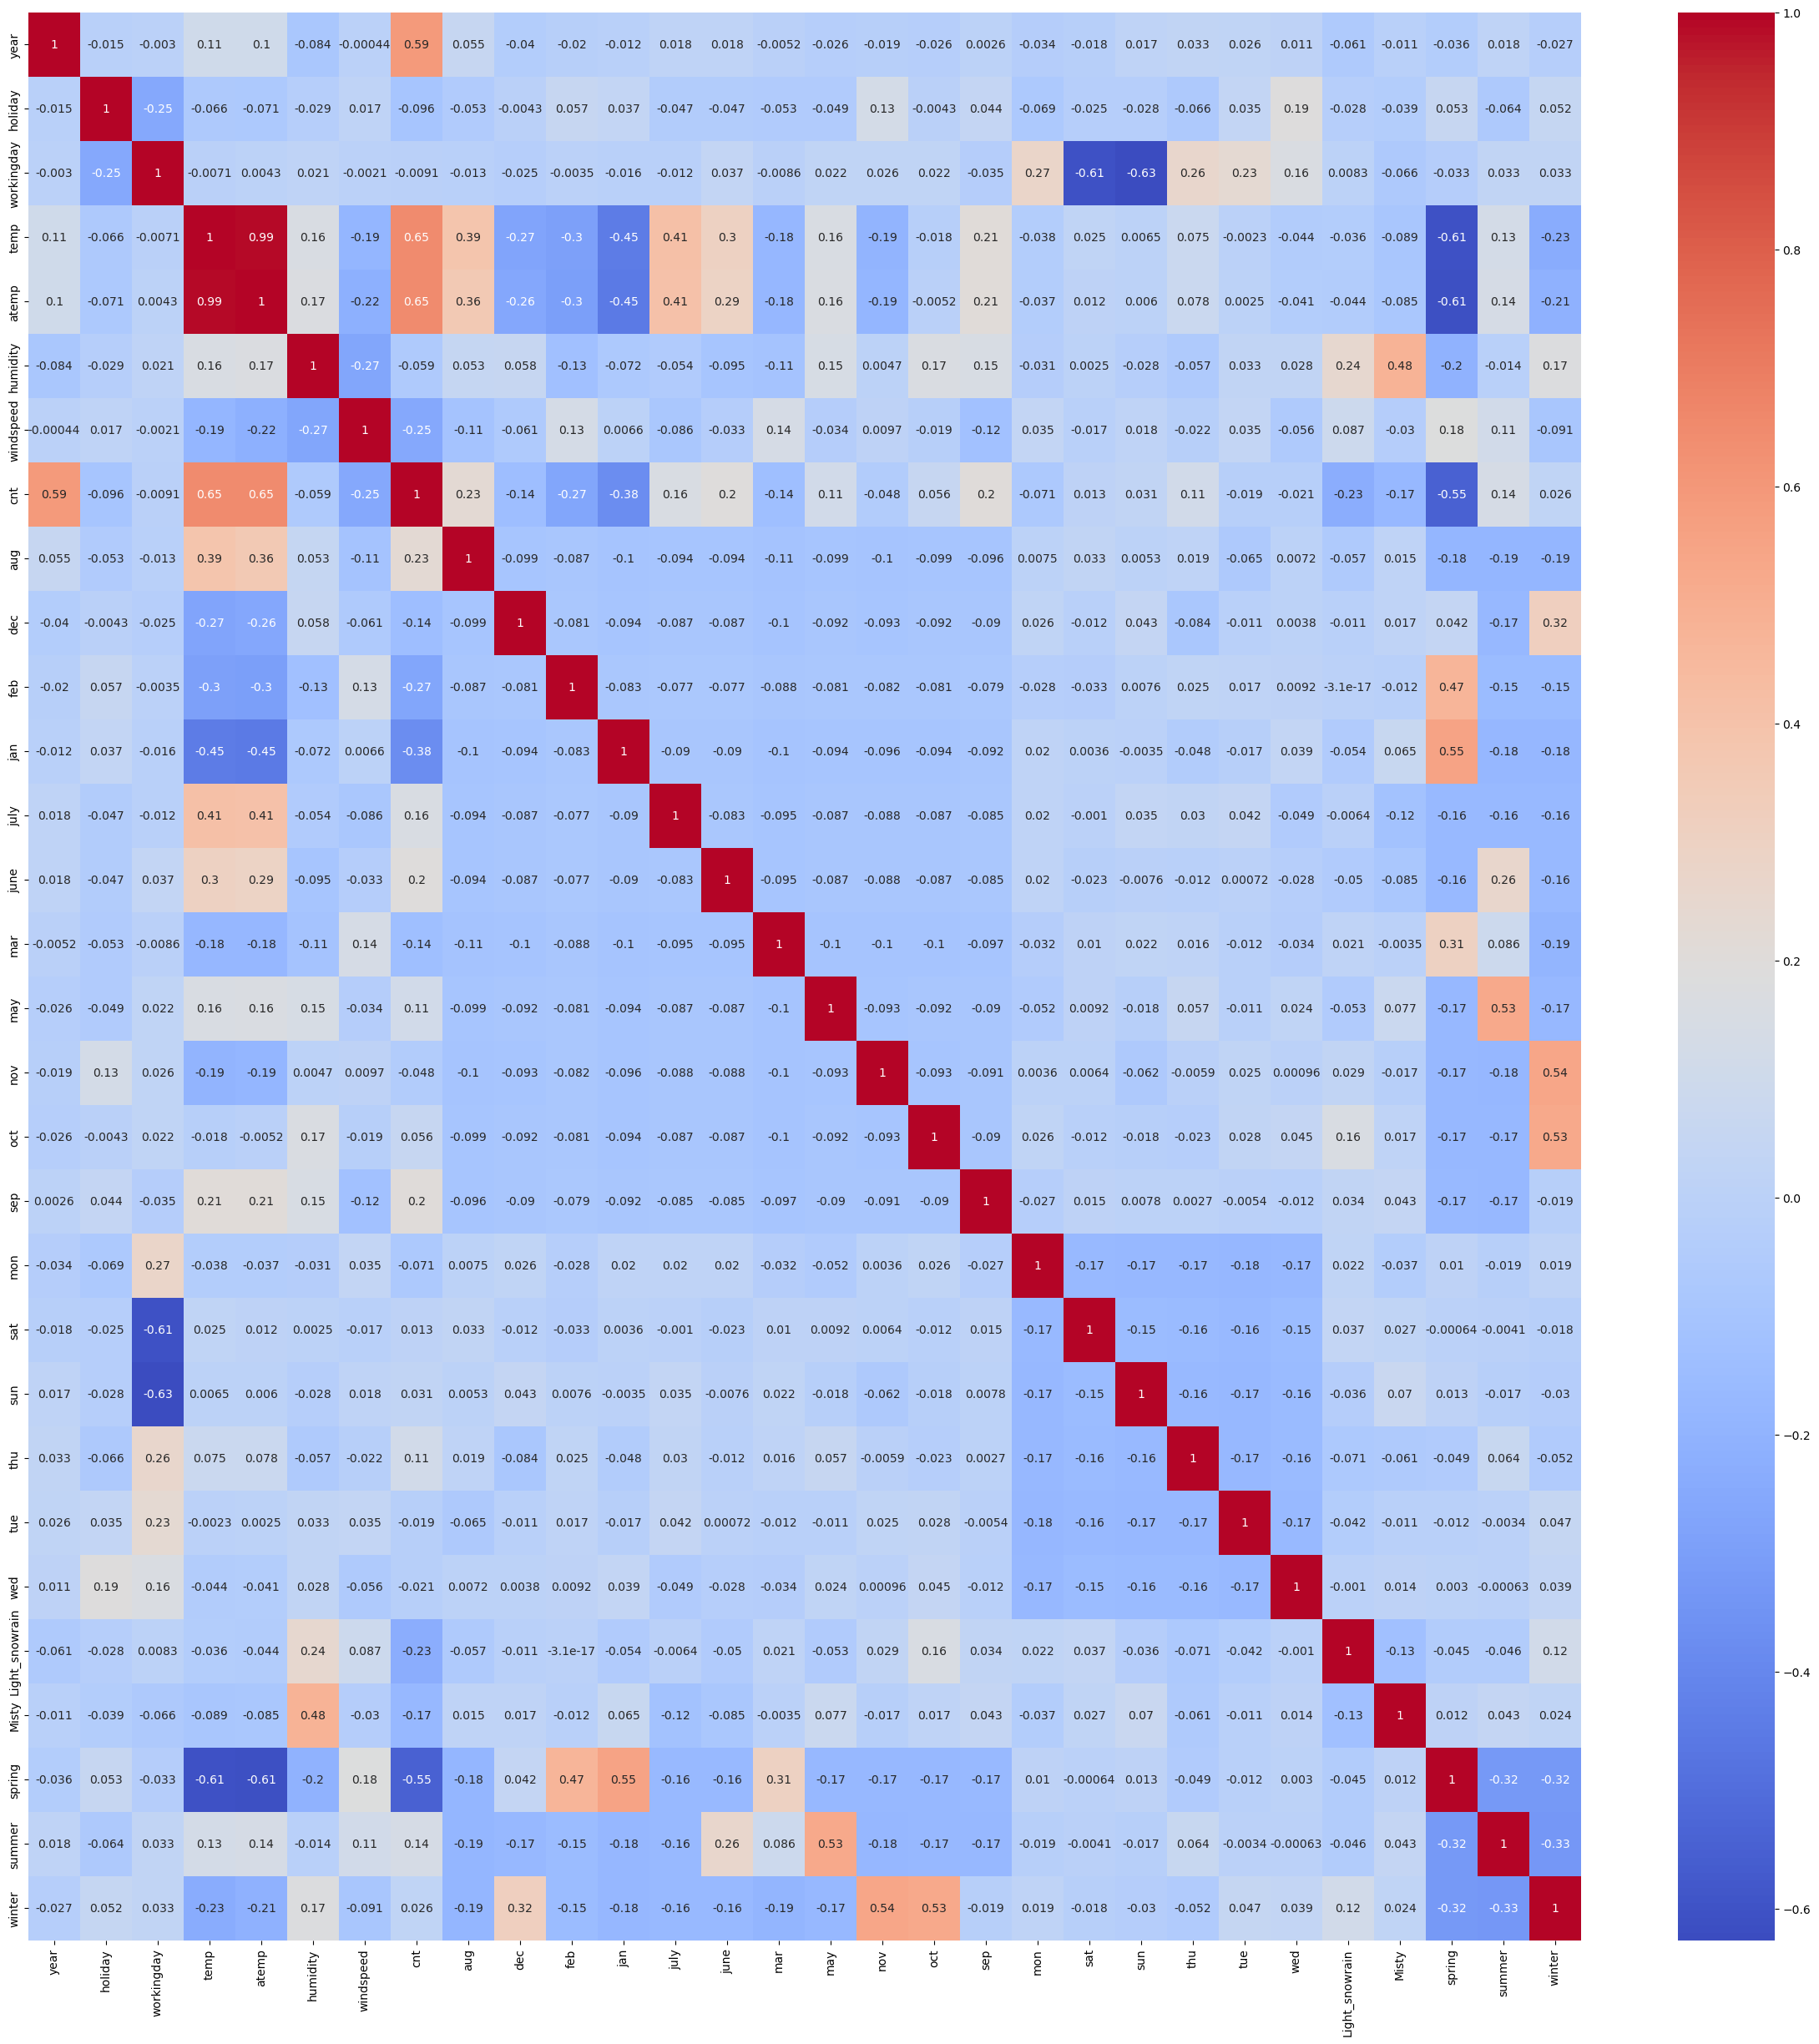

In [74]:
# Now, checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(bk_train.corr(), annot = True, cmap="coolwarm")
plt.show()

#### Inisghts:
- Strong Positive Correlation: Variables like temp (temperature) and atemp (feels-like temperature) show a very strong positive correlation (close to 1). This indicates that these variables are almost linearly dependent on each other.

- Year and Bike Rentals: The variable yr (year) shows a strong positive correlation with some other variables, which may suggest trends or growth over time.

- Multicollinearity Concerns: The high correlations between certain variables (like temp and atemp) might lead to multicollinearity issues if both are included in a linear regression model. This could inflate the variance of coefficient estimates and make the model less reliable.

- Negative Correlations: Some variables exhibit negative correlations, such as workingday and hum (humidity). This suggests that as one of these variables increases, the other tends to decrease.

- Weathersit and Other Variables: The variable weathersit (weather situation) seems to have a negative correlation with temperature variables, which aligns with the expectation that worse weather conditions like rain typically occur at lower temperatures.

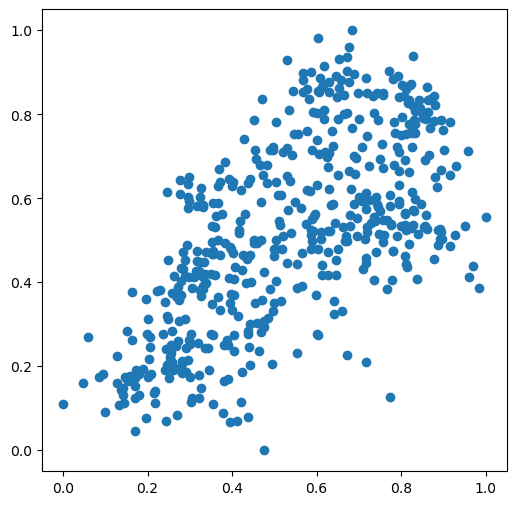

In [76]:
# Now Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bk_train.temp, bk_train.cnt)
plt.show()

In [77]:
# checking the columns of the train data set
bk_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [78]:
# Now building the Linear Model

y_train = bk_train.pop('cnt')
X_train = bk_train

In [79]:
# Creating a Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fitting RFE
rfe.fit(X_train, y_train)

# List of variables selected in the top 15 list
selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
print(selected_features)

[('year', True, 1), ('holiday', True, 1), ('workingday', False, 4), ('temp', True, 1), ('atemp', False, 3), ('humidity', True, 1), ('windspeed', True, 1), ('aug', False, 10), ('dec', True, 1), ('feb', False, 2), ('jan', True, 1), ('july', True, 1), ('june', False, 12), ('mar', False, 15), ('may', False, 9), ('nov', True, 1), ('oct', False, 13), ('sep', True, 1), ('mon', False, 8), ('sat', False, 5), ('sun', False, 6), ('thu', False, 14), ('tue', False, 7), ('wed', False, 11), ('Light_snowrain', True, 1), ('Misty', True, 1), ('spring', True, 1), ('summer', True, 1), ('winter', True, 1)]


In [80]:
# selecting the selected variable via RFE in col list

columns = X_train.columns[rfe.support_]
print(columns)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [81]:
# checking which columns has been rejected in train data set

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [82]:
# Now,dataframe with RFE selected variables

X_bk_train_rfe = X_train[columns]

In [83]:
# Dropping the 'humidity' feature from the predictor variables due to its high VIF value
X_bk_train_new = X_bk_train_rfe.drop(['humidity'], axis=1)

# Creating the function to calculate VIF (make sure this function is implemented correctly)
def calculate_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

# Recalculating the Variance Inflation Factor (VIF) for the remaining predictor variables
vif_new = calculate_vif(X_bk_train_new)

# Printing the updated VIF values for the remaining features
print(vif_new)


          Features   VIF
2             temp  5.17
3        windspeed  4.67
13          winter  2.95
11          spring  2.89
12          summer  2.24
0             year  2.07
7              nov  1.81
5              jan  1.66
6             july  1.59
10           Misty  1.57
4              dec  1.47
8              sep  1.35
9   Light_snowrain  1.09
1          holiday  1.06


In [84]:
# calculating VIF

calculate_vif(X_bk_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


### Building a linear model

In [86]:

# Adding a constant term (intercept) to the predictor variables for the linear regression model
X_train_df_lm_1 = sm.add_constant(X_bk_train_rfe)

# Building and fitting the Ordinary Least Squares (OLS) linear regression model
lr_df_1 = sm.OLS(y_train, X_train_df_lm_1).fit()

# Printing the summary of the regression model, which includes coefficients, p-values, R-squared, etc.
print(lr_df_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          8.15e-189
Time:                        13:48:06   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

#### Overall Summary:
- the model is well-fitted and many predictors are significant, but there might be some concerns about the normality of residuals that could warrant further investigation.

In [88]:
# Dropping the 'humidity' feature from the predictor variables due to its high VIF value
X_bk_train_new = X_bk_train_rfe.drop(['humidity'], axis=1)

# Recalculating the Variance Inflation Factor (VIF) for the remaining predictor variables
# This helps in assessing multicollinearity after removing 'humidity'
vif_new = calculate_vif(X_bk_train_new)

# Printing the updated VIF values for the remaining features
print(vif_new)

          Features   VIF
2             temp  5.17
3        windspeed  4.67
13          winter  2.95
11          spring  2.89
12          summer  2.24
0             year  2.07
7              nov  1.81
5              jan  1.66
6             july  1.59
10           Misty  1.57
4              dec  1.47
8              sep  1.35
9   Light_snowrain  1.09
1          holiday  1.06


In [89]:
# Adding a constant term (intercept) to the predictor variables for the second linear regression model
X_train_lm_2 = sm.add_constant(X_bk_train_new)

# Building and fiting the Ordinary Least Squares (OLS) linear regression model with the updated predictors
lr_df_2 = sm.OLS(y_train, X_train_lm_2).fit()

# Printing the summary of the second regression model, including coefficients, p-values, R-squared, etc.
print(lr_df_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          4.75e-186
Time:                        13:48:06   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

#### Overall Summary:
- the model shows a strong fit with significant predictors, but there are some concerns about the normality of residuals that might need further exploration.

In [91]:
# Dropping the 'nov' feature from the predictor variables due to its high p-value
# A high p-value indicates that 'nov' may not be a significant predictor in the model
X_bk_train_new = X_bk_train_new.drop(['nov'], axis=1)

# Recalculating the Variance Inflation Factor (VIF) for the updated set of predictor variables
# This helps in assessing multicollinearity among the remaining features after removing 'nov'
vif_new = calculate_vif(X_bk_train_new)

# Printing the updated VIF values for the remaining features
print(vif_new)

          Features   VIF
2             temp  5.14
3        windspeed  4.62
10          spring  2.89
11          summer  2.24
0             year  2.07
12          winter  2.05
5              jan  1.65
6             july  1.59
9            Misty  1.57
7              sep  1.34
4              dec  1.29
8   Light_snowrain  1.08
1          holiday  1.04


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [93]:
# Adding a constant term (intercept) to the predictor variables for the third linear regression model
X_train_lm_3 = sm.add_constant(X_bk_train_new)

# Building and fittng the Ordinary Least Squares (OLS) linear regression model with the updated predictors
lr_df_3 = sm.OLS(y_train, X_train_lm_3).fit()

# Printing the summary of the third regression model, including coefficients, p-values, R-squared, etc.
print(lr_df_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          2.74e-186
Time:                        13:48:06   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

#### Overall Summary: 
- the model shows strong performance with significant predictors, although some non-normality in the residuals is noted, which could warrant further investigation.

In [95]:
# Dropping the 'dec' feature from the predictor variables due to its high p-value
# A high p-value indicates that 'dec' may not be a significant predictor in the model
X_bk_train_new = X_bk_train_new.drop(['dec'], axis=1)

# Recalculating the Variance Inflation Factor (VIF) for the updated set of predictor variables
# This helps in assessing multicollinearity among the remaining features after removing 'dec'
vif_new = calculate_vif(X_bk_train_new)

# Printing the updated VIF values for the remaining features
print(vif_new)

          Features   VIF
2             temp  5.13
3        windspeed  4.62
9           spring  2.75
10          summer  2.24
0             year  2.07
11          winter  1.78
4              jan  1.61
5             july  1.59
8            Misty  1.56
6              sep  1.34
7   Light_snowrain  1.08
1          holiday  1.04


In [96]:
# Adding a constant term (intercept) to the predictor variables for the fourth linear regression model
X_train_lm_4 = sm.add_constant(X_bk_train_new)

# Building and fitting the Ordinary Least Squares (OLS) linear regression model with the updated predictors
lr_df_4 = sm.OLS(y_train, X_train_lm_4).fit()

# Printing the summary of the fourth regression model, including coefficients, p-values, R-squared, etc.
print(lr_df_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          8.14e-187
Time:                        13:48:06   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

#### Overall Summary:
- The model shows strong predictive power with key variables like temperature, wind speed, and seasonal factors significantly influencing bike rentals. While there is some concern regarding the normality of residuals, the model’s overall fit and validity remain strong, with minimal autocorrelation detected.

In [98]:
# Dropping the 'jan' feature from the predictor variables due to its high p-value
# A high p-value suggests that 'jan' may not significantly contribute to the model
X_bk_train_new = X_bk_train_new.drop(['jan'], axis=1)

# Recalculating the Variance Inflation Factor (VIF) for the updated set of predictor variables
# This assesses multicollinearity among the remaining features after removing 'jan'
vif_new = calculate_vif(X_bk_train_new)

# Printing the updated VIF values to check for multicollinearity among the remaining features
print(vif_new)


          Features   VIF
2             temp  5.09
3        windspeed  4.60
9           summer  2.23
8           spring  2.08
0             year  2.07
10          winter  1.78
4             july  1.58
7            Misty  1.55
5              sep  1.34
6   Light_snowrain  1.08
1          holiday  1.04


In [99]:

# Adding a constant term (intercept) to the predictor variables for the fifth linear regression model
X_train_lm_5 = sm.add_constant(X_bk_train_new)

# Building and fitting the Ordinary Least Squares (OLS) linear regression model with the updated predictors
lr_df_5 = sm.OLS(y_train, X_train_lm_5).fit()

# Printing the summary of the fifth regression model, including coefficients, p-values, R-squared, etc.
print(lr_df_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          5.06e-187
Time:                        13:48:06   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

#### Overall Summary:
- The model is highly effective in explaining the factors that influence bike rentals. Key variables such as temperature, wind speed, and weather conditions significantly affect rental patterns. The model also highlights seasonal variations, with higher rentals in winter and summer, and fewer in spring and during holidays. While there is some indication of non-normality in residuals, the overall model fit and diagnostics suggest that the findings are reliable.

In [101]:
# Dropping the 'july' feature from the predictor variables due to its high p-value
# A high p-value indicates that 'july' may not be a significant predictor in the model
X_bk_train_new = X_bk_train_new.drop(['july'], axis=1)

# Recalculating the Variance Inflation Factor (VIF) for the updated set of predictor variables
# This helps in assessing multicollinearity among the remaining features after removing 'july'
vif_new = calculate_vif(X_bk_train_new)

# Print the updated VIF values to check for multicollinearity among the remaining features
print(vif_new)

         Features   VIF
3       windspeed  4.60
2            temp  3.84
0            year  2.07
7          spring  1.99
8          summer  1.90
9          winter  1.63
6           Misty  1.55
4             sep  1.23
5  Light_snowrain  1.08
1         holiday  1.04


In [102]:


# Adding a constant term (intercept) to the predictor variables for the sixth linear regression model
X_train_lm_6 = sm.add_constant(X_bk_train_new)

# Building and fiting the Ordinary Least Squares (OLS) linear regression model with the updated predictors
lr_df_6 = sm.OLS(y_train, X_train_lm_6).fit()

# Printing the summary of the sixth regression model, including coefficients, p-values, R-squared, etc.
print(lr_df_6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          1.47e-186
Time:                        13:48:06   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

#### Overall Summary:
- The model effectively captures the key factors influencing bike rentals. The significant predictors include temperature, wind speed, holiday status, and weather conditions, all of which play crucial roles in determining bike rental counts. Seasonal effects also vary, with higher rentals in summer and winter, and fewer in spring and holidays. Although the model diagnostics suggest some non-normality in residuals, the strong R-squared and adjusted R-squared values indicate that the model is reliable and well-fitted.

- lr_df_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
- F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

### Residual Analysis

In [106]:
X_train_lm_6

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
580,1.0,1,0,0.914852,0.462538,0,0,0,0,0,0
500,1.0,1,0,0.719639,0.172431,0,0,0,0,1,0
479,1.0,1,0,0.520271,0.164434,0,0,0,0,1,0
472,1.0,1,0,0.503656,0.270032,0,0,1,0,1,0
455,1.0,1,0,0.456929,0.279394,0,0,1,0,1,0


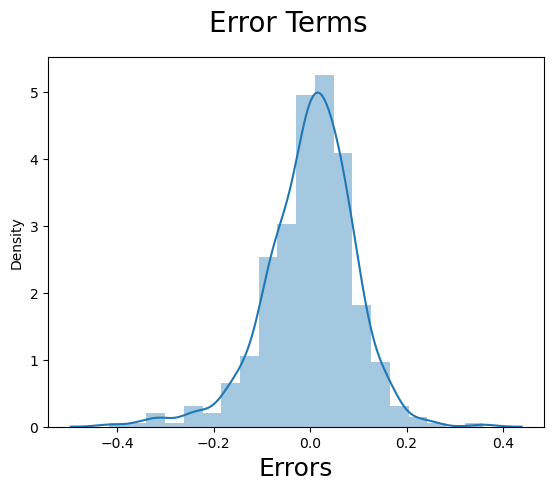

In [107]:
y_train_pred = lr_df_6.predict(X_train_lm_6)
# Creating a new figure for the histogram plot
fig = plt.figure()

# Plotting the histogram of the error terms using seaborn's distplot
# The error terms are calculated as the difference between the actual and predicted values
sns.distplot((y_train - y_train_pred), bins=20)

# Seting the title of the plot
fig.suptitle('Error Terms', fontsize=20)

# Labeling the x-axis as 'Errors'
plt.xlabel('Errors', fontsize=18)

# Showing the plot
plt.show()

#### Inisghts:
- The error terms seem to be symmetrically distributed around zero, which is generally a good indication that your model's errors are unbiased. The symmetry suggests that the model neither consistently overpredicts nor underpredicts.

- The shape of the KDE curve resembles a bell curve, indicating that the errors might be approximately normally distributed. This is often an assumption in many statistical models, particularly linear regression, where normally distributed errors validate the model’s reliability.

- The peak of the distribution is centered around zero, reinforcing that the model's predictions are, on average, accurate.

- The spread of the error terms appears to be moderate, with most errors concentrated close to zero. This suggests that the model’s predictions are reasonably close to the actual values, with few large deviations.


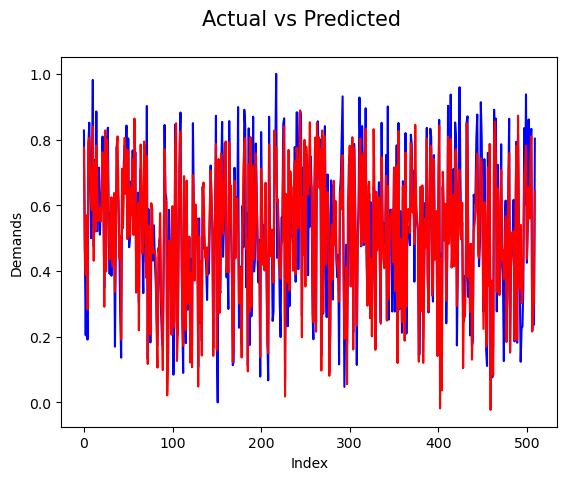

In [109]:
# Actual vs Predicted
# Creating a list of indices ranging from 0 to the length of the training data
c = [i for i in range(0, len(X_train), 1)]

# Plotting the actual values from the training data
plt.plot(c, y_train, color="blue", label="Actual")

# Plotting the predicted values from the training data
plt.plot(c, y_train_pred, color="red", label="Predicted")

# Adding a title to the plot
plt.suptitle('Actual vs Predicted', fontsize=15)

# Labeling the x-axis as 'Index' to represent the indices
plt.xlabel('Index')

# Labeling the y-axis as 'Demands' to represent the demand values
plt.ylabel('Demands')

# Displaying the plot with all the elements
plt.show()

#### Inisghts
- plot shows a significant amount of variability in both the actual and predicted values. This suggests that the data has a wide range of demands, making it challenging for the model to consistently predict values accurately.

- The actual and predicted lines are closely overlapping throughout the plot. This indicates that the model is performing well in capturing the general trends of the actual demands.

- Although the actual and predicted values follow similar patterns, there are visible differences. These differences appear to be somewhat randomly scattered rather than systematically biased in one direction, which is good because it suggests that the model does not have a consistent error in overpredicting or underpredicting.

- Consistency Across the Index: The performance of the model appears to be relatively consistent across the index. There are no large sections where the predictions systematically deviate from the actual values, implying that

#### MultiColinearity

In [112]:
#checking the vif value of X_bk_train_new
calculate_vif(X_bk_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [113]:
#Printing R-squared Value
r2_score(y_train,y_train_pred)


0.8327073211549113

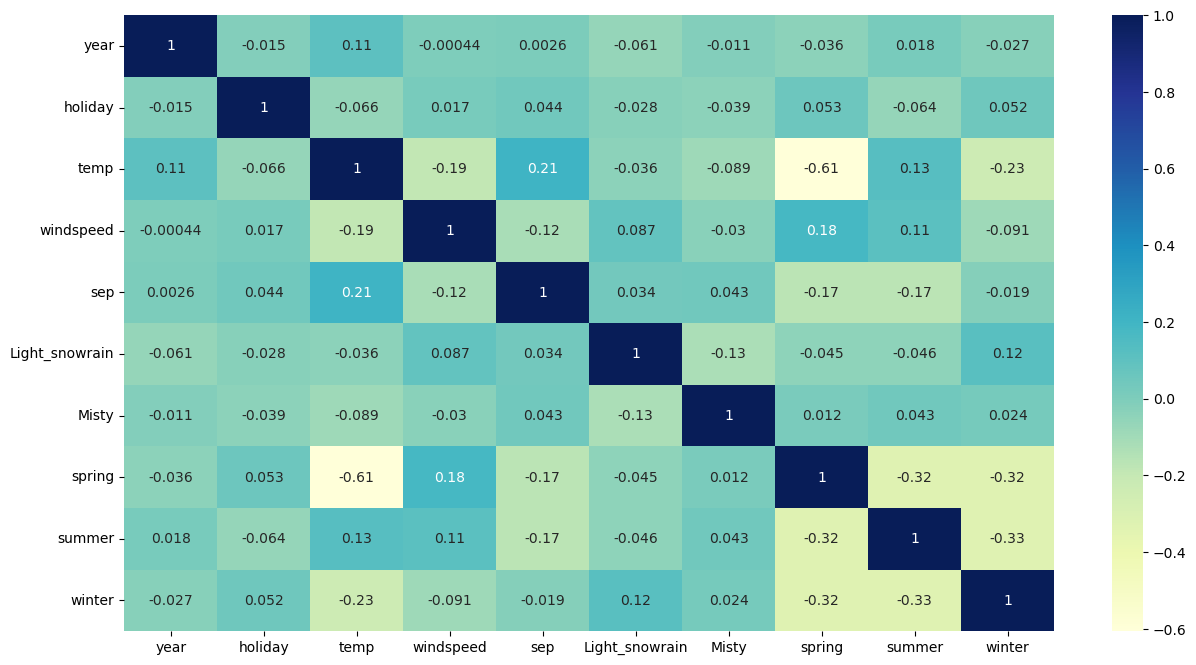

In [114]:
# Setting the figure size for the heatmap
plt.figure(figsize=(15, 8))

# Ploting the heatmap of the correlation matrix with a new color palette
sns.heatmap(X_bk_train_new.corr(), annot=True, cmap="YlGnBu")

# Displaying the heatmap
plt.show()

#### Inisghts

- Spring and Temp: There is a strong negative correlation (-0.61) between the "spring" season and "temp." This suggests that temperatures during the spring season are typically lower in this dataset.
- The seasons "spring," "summer," and "winter" are all negatively correlated with each other (around -0.32 to -0.33), indicating that as one season progresses, the presence of other seasons naturally decreases.
Moderate Positive Correlations:

- There is a moderate positive correlation (0.21) between "sep" and "temp," suggesting that higher temperatures might occur in September (assuming "sep" represents September).
- A positive correlation (0.18) between "spring" and "windspeed" suggests that wind speeds might be slightly higher during the spring season.
Weak or No Significant Correlation:

- Year, Holiday, and Weather Conditions: Most of the correlations involving "year," "holiday," and weather conditions like "Light_snowrain" and "Misty" are quite weak, suggesting that these variables do not strongly influence each other.
Interplay Between Weather and Season:

- There is a positive correlation (0.13) between "temp" and "summer," which aligns with the expectation that temperatures are generally higher during the summer season.
- Light_snowrain and Windspeed: A weak positive correlation (0.087) indicates that light snow or rain conditions might slightly increase windspeed.
Independent Variables:

- The "year" variable has almost no correlation with any other variables, which could imply that the data does not exhibit any significant time trends or that year-to-year changes are minimal within the dataset.

#### Linearity

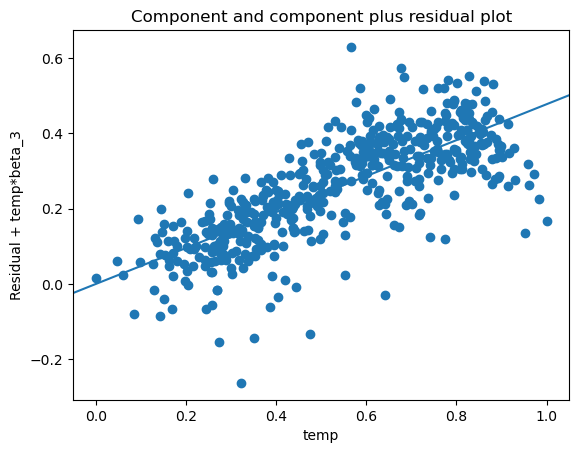

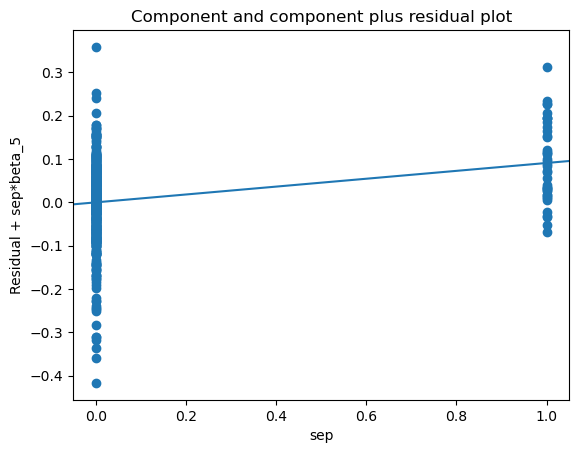

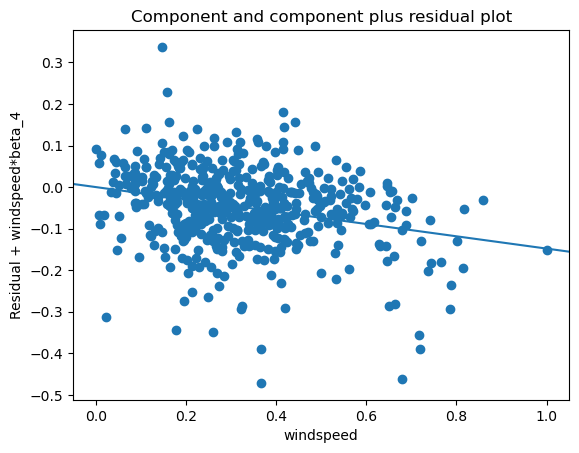

In [117]:
# Plotting the CCPR plot for the 'temp' variable
# CCPR helps visualize the relationship between 'temp' and the target variable, while accounting for the effects of other variables in the model
sm.graphics.plot_ccpr(lr_df_6, 'temp')
plt.show()

# Plotting the CCPR plot for the 'sep' variable
# This plot shows how 'sep' is related to the target variable, after adjusting for other predictors
sm.graphics.plot_ccpr(lr_df_6, 'sep')
plt.show()

# Plotting the CCPR plot for the 'windspeed' variable
# It demonstrates the relationship between 'windspeed' and the target variable, controlling for other variables
sm.graphics.plot_ccpr(lr_df_6, 'windspeed')
plt.show()

#### Insights
- Model Fit: The temp variable seems to be the strongest predictor among the three, with a clear positive linear relationship.
- Potential Issues: The sep predictor shows a concentration of data points at the extremes, which could indicate a lack of variation in the middle range or potential issues with how this variable is captured or modeled.
- Interpretation: The relationships captured in these plots suggest that while temp and windspeed are contributing predictors, sep might require further investigation or a different modeling approach to capture its effect accurately.

### Homoscedasticity

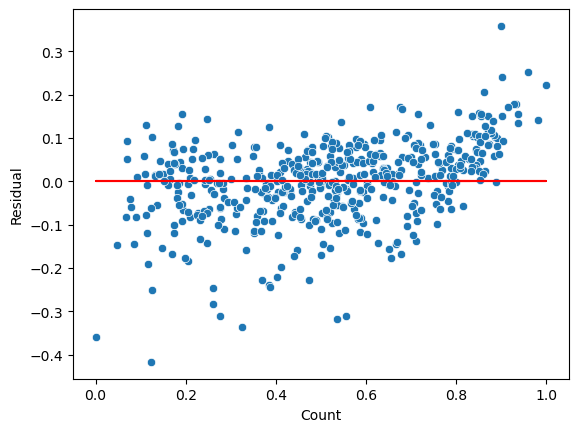

In [120]:
# Predicting the target variable using the 6th linear regression model
y_train_pred = lr_df_6.predict(X_train_lm_6)

# Calculating the residuals (errors) by subtracting the predicted values from the actual target values
residual = y_train - y_train_pred

# Creating a scatter plot of the residuals against the actual target values
# The 'x' argument is for the x-axis data, and 'y' is for the y-axis data
sns.scatterplot(x=y_train, y=residual)

# Plotting a horizontal reference line at zero (where residuals should ideally cluster around)
plt.plot(y_train, [0]*len(y_train), '-r')

# Labeling the x-axis as 'Count', representing the actual target variable values
plt.xlabel('Count')

# Labeling the y-axis as 'Residual', representing the errors in prediction
plt.ylabel('Residual')

# Showing the scatter plot with the reference line
plt.show()

#### Insights:
- Random Distribution of Residuals: The residuals appear to be randomly scattered around the red horizontal line (zero residual line). This indicates that the model is not showing systematic errors, which is a good sign of model adequacy.

- No Clear Pattern: The absence of a clear pattern or trend in the residuals suggests that the model captures the underlying relationship between the variables well, and there is no obvious bias in the predictions.

- Durbin-Watson Statistic: The provided Durbin-Watson value of 2.085 indicates that there is no significant autocorrelation in the residuals. Values close to 2 suggest no autocorrelation, while values approaching 0 or 4 indicate positive or negative autocorrelation, respectively.

- Variance of Residuals: There is some variance in the residuals across different values of "Count." The spread of residuals seems to increase slightly as the "Count" value increases, which might indicate heteroscedasticity (non-constant variance). However, this variation does not appear to be severe.

### Making Predictions after Analysing the Final Model

In [125]:
# Applying scaling on the test dataset

numerical_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bk_test[numerical_vars] = scaler.transform(bk_test[numerical_vars])
bk_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [126]:
# checking the test data set
bk_test.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
y_test = bk_test.pop('cnt')
X_test = bk_test

In [128]:
# Extracting the columns from the training set that were used in the final model
# This ensures that the test set has the same features as the training set
col1 = X_bk_train_new.columns

# Subseting the test set to include only the columns that were used in the final model
# This aligns the features in the test set with those in the training set
X_test = X_test[col1]

# Adding a constant term (intercept) to the test DataFrame for prediction
# The constant term is necessary for the model to make predictions, as it includes the intercept in the model
X_test_lm_6 = sm.add_constant(X_test)

In [129]:
y_pred = lr_df_6.predict(X_test_lm_6)

In [130]:
# Calculating the R-squared value, which measures the proportion of the variance in the dependent variable 
# that is predictable from the independent variables
# 'y_test' is the actual target values in the test set, and 'y_pred' are the predicted values from the model
r2 = r2_score(y_test, y_pred)

# Rounding the R-squared value to 4 decimal places for easier interpretation and reporting
r2_rounded = round(r2, 4)

# Output the rounded R-squared value
print(r2_rounded)

0.8038


### Evaluting the model

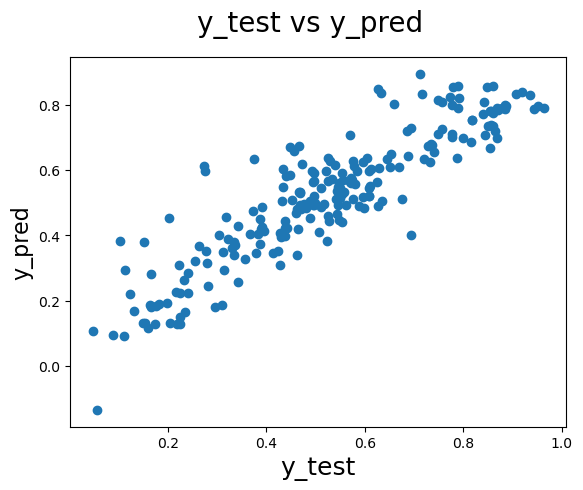

In [132]:
# Creating a new figure for the scatter plot
fig = plt.figure()

# Plotting a scatter plot of the actual target values (y_test) against the predicted values (y_pred)
# This plot helps visualize the relationship between the actual and predicted values
plt.scatter(y_test, y_pred)

# Setting the title of the plot
# The title helps in understanding what the plot represents
fig.suptitle('y_test vs y_pred', fontsize=20)

# Labeling the x-axis as 'y_test', representing the actual target values
plt.xlabel('y_test', fontsize=18)

# Labeling the y-axis as 'y_pred', representing the predicted target values
plt.ylabel('y_pred', fontsize=16)

# Showing the plot
plt.show()

#### Insights
- Positive Correlation: There is a strong positive correlation between y_test and y_pred, as evidenced by the points generally following a diagonal trend from the bottom left to the top right.

- Model Accuracy: The clustering of points around the diagonal line (where y_test = y_pred) suggests that the model is making accurate predictions. The closer the points are to this line, the better the predictions.

- Outliers: There are a few points that are far from the diagonal line, which indicates instances where the model's predictions significantly differ from the actual values. These outliers may require further investigation.

- Variance: The spread of points suggests that the model's predictions are more accurate for some values of y_test than others. For instance, there seems to be more variance in predictions at higher values of y_test.

In [134]:
round(lr_df_6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

In [135]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)


0.7944


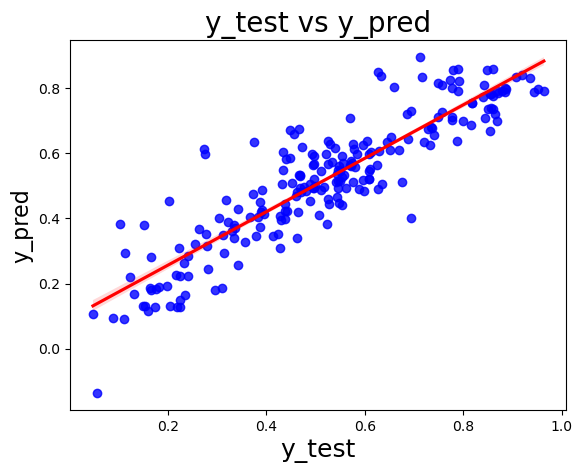

In [236]:

# Creating a new figure for the regression plot
plt.figure()

# Plotting a regression plot of the actual target values (y_test) against the predicted values (y_pred)
# This plot includes a regression line that shows the best linear fit of the data
# 'ci=68' specifies the confidence interval for the regression line
# 'fit_reg=True' ensures the regression line is plotted
# 'scatter_kws={"color": "blue"}' sets the color of the scatter points to blue
# 'line_kws={"color": "red"}' sets the color of the regression line to red
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Seting the title of the plot
# The title helps in understanding what the plot represents
plt.title('y_test vs y_pred', fontsize=20)

# Labeling the x-axis as 'y_test', representing the actual target values
plt.xlabel('y_test', fontsize=18)

# Labeling the y-axis as 'y_pred', representing the predicted target values
plt.ylabel('y_pred', fontsize=16)

# Displaying the plot
plt.show()

#### Final Report on Test & Train

Final Comparision of R^2 and Adjsuted R^2:
- Train R^2 : 0.8303 [Train values results are taken from Model-6]
- Train Adjusted R^2 :0.829 [Train values results are taken from Model-6]
- Test R^2 :0.7941
- Test Adjusted R^2 :0.8038
- This seems to be a good model that can very well 'Generalize' various datasets.

In [139]:
lr_df_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

## Conclusion:

- The final model provides a statistically significant fit, indicating that the relationships it captures between the predictors and bike hire numbers are not due to random chance. This suggests that the model has decent predictive power and can be relied upon for forecasting bike demand.

- Top Predictors:-
   - Temperature (temp) emerges as the most influential factor in determining bike hire numbers. For every unit increase in temperature, there is an increase of approximately 0.477737 units in bike hires. This emphasizes the strong correlation between warmer weather and higher bike usage.
   - Year (year) also plays a critical role, with each additional year contributing to a 0.234132 unit increase in bike hires. This likely reflects a growing trend in bike usage over time, possibly due to increasing popularity or infrastructure improvements.
   - Month of September (sep) is another significant predictor, where each unit increase in this variable results in an additional 0.090998 units in bike hires. This suggests that September is a peak month for bike demand, perhaps due to favorable weather conditions or seasonal trends.
Key Insights:
   - Temperature, the year, and the month of September should be prioritized in strategic planning to maximize bike demand. These factors have shown the strongest positive influence on bike hire numbers and should be the focus of demand management efforts.
   - Holiday Impact: The holiday variable negatively influences bike hires, with each unit increase in holidays leading to a reduction of 0.096316 units. This indicates that fewer people might use bikes on holidays, possibly due to alternative leisure activities or travel patterns.

   - Wind Speed Impact: Wind speed is another factor that negatively affects bike usage, reducing hires by 0.148098 units for each unit increase. This suggests that higher wind speeds may deter people from using bikes, likely due to the increased physical effort required.

- Recommendation:-
   - To effectively plan for and boost bike demand, it's essential to manage and leverage the top predictors—temperature, the year, and the month of September. These factors should be central to forecasting and operational strategies.
Additionally, holidays and wind speed, which negatively impact bike bookings, should be carefully monitored. Understanding these effects can help in adjusting expectations and potentially mitigating their impact through promotions or other incentives.
   - Conclusion: Overall, the model offers valuable insights into the key factors driving bike hire numbers. By focusing on the most influential variables and accounting for the negative impacts of others, more informed and effective decisions can be made to optimize bike bookings and meet demand.

### The equation of our best fitted line is:

CNT (Target variable) = 0.190855 + (year × 0.234132) − (holiday × 0.096316) + (temp × 0.477737) − (windspeed × 0.148098) + (sep × 0.090998) − (Light_snowrain × 0.285031) − (Misty × 0.078741) − (spring × 0.055406) + (summer × 0.062076) + (winter × 0.094476)